Name: Shirisha Hechirla(sh23v)

# MLP with Dropout

## Imports

In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# From local helper files
from helper_evaluation import set_all_seeds, set_deterministic
from helper_train import train_model
from helper_plotting import plot_training_loss, plot_accuracy, show_examples
from helper_dataset import get_dataloaders_mnist

## Settings and Dataset

In [9]:
##########################
### SETTINGS
##########################

RANDOM_SEED = 123
BATCH_SIZE = 256
NUM_HIDDEN_1 = 75
NUM_HIDDEN_2 = 45
NUM_EPOCHS = 10
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [10]:
set_all_seeds(RANDOM_SEED)
set_deterministic()

In [11]:
##########################
### MNIST DATASET
##########################

train_loader, valid_loader, test_loader = get_dataloaders_mnist(
    batch_size=BATCH_SIZE,
    validation_fraction=0.1)

# Checking the dataset
for images, labels in train_loader:
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

Using downloaded and verified file: data/MNIST/raw/train-images-idx3-ubyte.gz
Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 497kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.46MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.59MB/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Image batch dimensions: torch.Size([256, 1, 28, 28])
Image label dimensions: torch.Size([256])
Class labels of 10 examples: tensor([4, 5, 8, 9, 9, 4, 9, 9, 3, 9])


## Model

In [12]:
class MultilayerPerceptron(torch.nn.Module):

    def __init__(self, num_features, num_classes, drop_proba,
                 num_hidden_1, num_hidden_2):
        super().__init__()

        self.my_network = torch.nn.Sequential(
            # 1st hidden layer
            torch.nn.Flatten(),
            torch.nn.Linear(num_features, num_hidden_1),
            torch.nn.ReLU(),
            # 2nd hidden layer
            torch.nn.Linear(num_hidden_1, num_hidden_2),
            torch.nn.ReLU(),
            # output layer
            torch.nn.Linear(num_hidden_2, num_classes)
        )

        for m in self.modules():
            if isinstance(m, torch.nn.Linear):
                torch.nn.init.kaiming_uniform_(m.weight, mode='fan_in', nonlinearity='relu')
                if m.bias is not None:
                    m.bias.detach().zero_()

    def forward(self, x):
        logits = self.my_network(x)
        return logits

Epoch: 001/010 | Batch 0000/0210 | Loss: 2.6304
Epoch: 001/010 | Batch 0050/0210 | Loss: 0.6442
Epoch: 001/010 | Batch 0100/0210 | Loss: 0.3852
Epoch: 001/010 | Batch 0150/0210 | Loss: 0.3313
Epoch: 001/010 | Batch 0200/0210 | Loss: 0.2585
Epoch: 001/010 | Train: 90.83% | Validation: 92.57%
Time elapsed: 0.29 min
Epoch: 002/010 | Batch 0000/0210 | Loss: 0.2815
Epoch: 002/010 | Batch 0050/0210 | Loss: 0.3328
Epoch: 002/010 | Batch 0100/0210 | Loss: 0.2883
Epoch: 002/010 | Batch 0150/0210 | Loss: 0.2684
Epoch: 002/010 | Batch 0200/0210 | Loss: 0.2473
Epoch: 002/010 | Train: 92.97% | Validation: 94.52%
Time elapsed: 0.58 min
Epoch: 003/010 | Batch 0000/0210 | Loss: 0.2372
Epoch: 003/010 | Batch 0050/0210 | Loss: 0.2117
Epoch: 003/010 | Batch 0100/0210 | Loss: 0.2544
Epoch: 003/010 | Batch 0150/0210 | Loss: 0.2412
Epoch: 003/010 | Batch 0200/0210 | Loss: 0.2204
Epoch: 003/010 | Train: 93.90% | Validation: 94.80%
Time elapsed: 0.88 min
Epoch: 004/010 | Batch 0000/0210 | Loss: 0.2234
Epoch: 

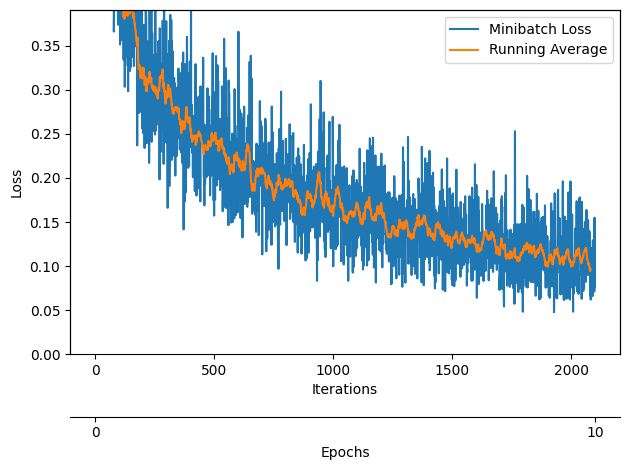

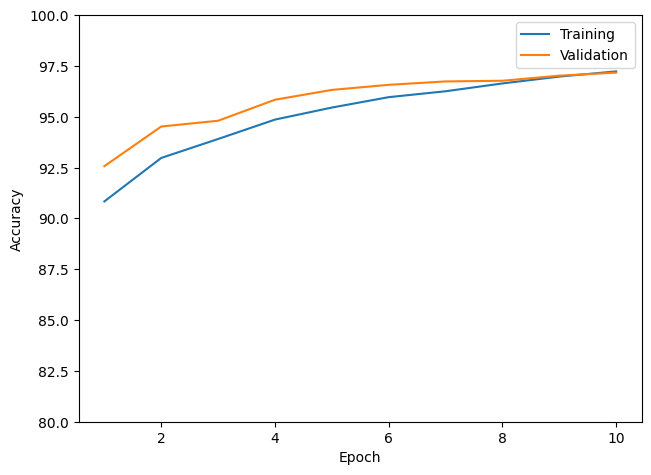

In [13]:
torch.manual_seed(RANDOM_SEED)
model = MultilayerPerceptron(num_features=28*28,
                             num_hidden_1=NUM_HIDDEN_1,
                             num_hidden_2=NUM_HIDDEN_2,
                             drop_proba=0.5,
                             num_classes=10)
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([80, 100])
plt.show()